# Comparison plots for APOGEE and MWM

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from apogee_tools import import_apogee
from mwm_tools import import_mwm
import paths
import distribution_functions as dfs
from utils import get_color_list, get_bin_centers
import _globals

In [2]:
apogee_data = import_apogee()
apogee_data

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,O_FE,O_FE_ERR,LATENT_AGE,LATENT_AGE_ERR,LOG_LATENT_AGE,LOG_LATENT_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,0.023554,-0.160280,0.006890,0.113698,0.023433,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,0.035517,-0.509530,0.011012,0.185943,0.039313,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,0.024334,-0.075011,0.008396,0.027783,0.016560,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,0.029259,-0.139290,0.009310,0.087976,0.033478,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,0.026512,-0.082189,0.009157,0.043742,0.020672,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192985,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,0.030519,-0.408670,0.009130,-0.031660,0.032894,NaN,NaN,NaN,NaN
192986,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,0.026187,-0.504450,0.009010,0.287303,0.012854,NaN,NaN,NaN,NaN
192987,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,0.034748,-0.333100,0.011422,0.130718,0.037808,NaN,NaN,NaN,NaN
192988,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,0.024013,-0.236560,0.007337,0.088913,0.019459,NaN,NaN,NaN,NaN


In [75]:
mwm_data = import_mwm()
mwm_data

/mnt/c/Users/dubay.11/Repos/galactic-dtd/src/scripts/mwm_tools.py:48: DtypeWarning: Columns (45,138,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(sample_file_path)


,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,raw_e_ti_2_h,raw_v_h,raw_e_v_h,O_FE,O_FE_ERR,FE_H,FE_H_ERR,GALR,GALPHI,GALZ
0,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,NaN,-0.77444,0.002761,0.165681,0.042832,-0.440753,0.011268,12.087988,173.578696,-1.286873
1,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,NaN,-0.68217,0.000180,0.061359,0.030318,-0.524303,0.010089,9.947272,177.879409,-0.787836
2,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,NaN,-0.55261,0.000382,-0.015609,0.031277,-0.130393,0.010183,8.721607,179.757534,-0.333179
3,115029776,2M03521583+2129049,63675918118074240,63675918118074240,440704542,62290,NaN,gaia_dr3_source,31,63050396552967384,...,NaN,-0.63475,0.001017,0.134281,0.034340,-0.331533,0.010481,9.832419,178.162043,-0.768381
4,76315157,2M03521608+0923173,3302476533731766400,3302476533731766400,345453479,81746,NaN,gaia_dr3_source,31,63050395130270017,...,NaN,-0.42060,0.000946,0.093151,0.033987,-0.306583,0.010466,9.291797,179.937830,-0.733905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386527,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,NaN,-0.75906,0.001375,0.085641,0.035345,-0.447573,0.010665,12.102105,173.705737,-1.250867
386528,54636799,2M03484443+5409069,444479091656883840,444479091656883840,86637304,18685,NaN,gaia_dr3_source,31,63050394790173013,...,NaN,-0.16905,0.000304,0.016659,0.031530,0.019210,0.010150,9.831466,173.759186,0.018624
386529,115028161,2M03484463+2052406,63258236840589056,63258236840589056,440689754,63313,NaN,gaia_dr3_source,31,63050396552949649,...,NaN,-0.59001,0.000866,0.013251,0.033119,-0.021603,0.010411,9.273240,178.663139,-0.536094
386530,114948039,2M03484484+1416348,39727833309894400,39727833309894400,59003384,73553,NaN,gaia_dr3_source,31,63050396552057306,...,NaN,-0.57891,0.000605,0.040747,0.032429,-0.258403,0.010284,9.009043,179.466832,-0.496640


## Galactic Overview Plot

In [4]:
plt.style.use(paths.styles / 'presentation.mplstyle')

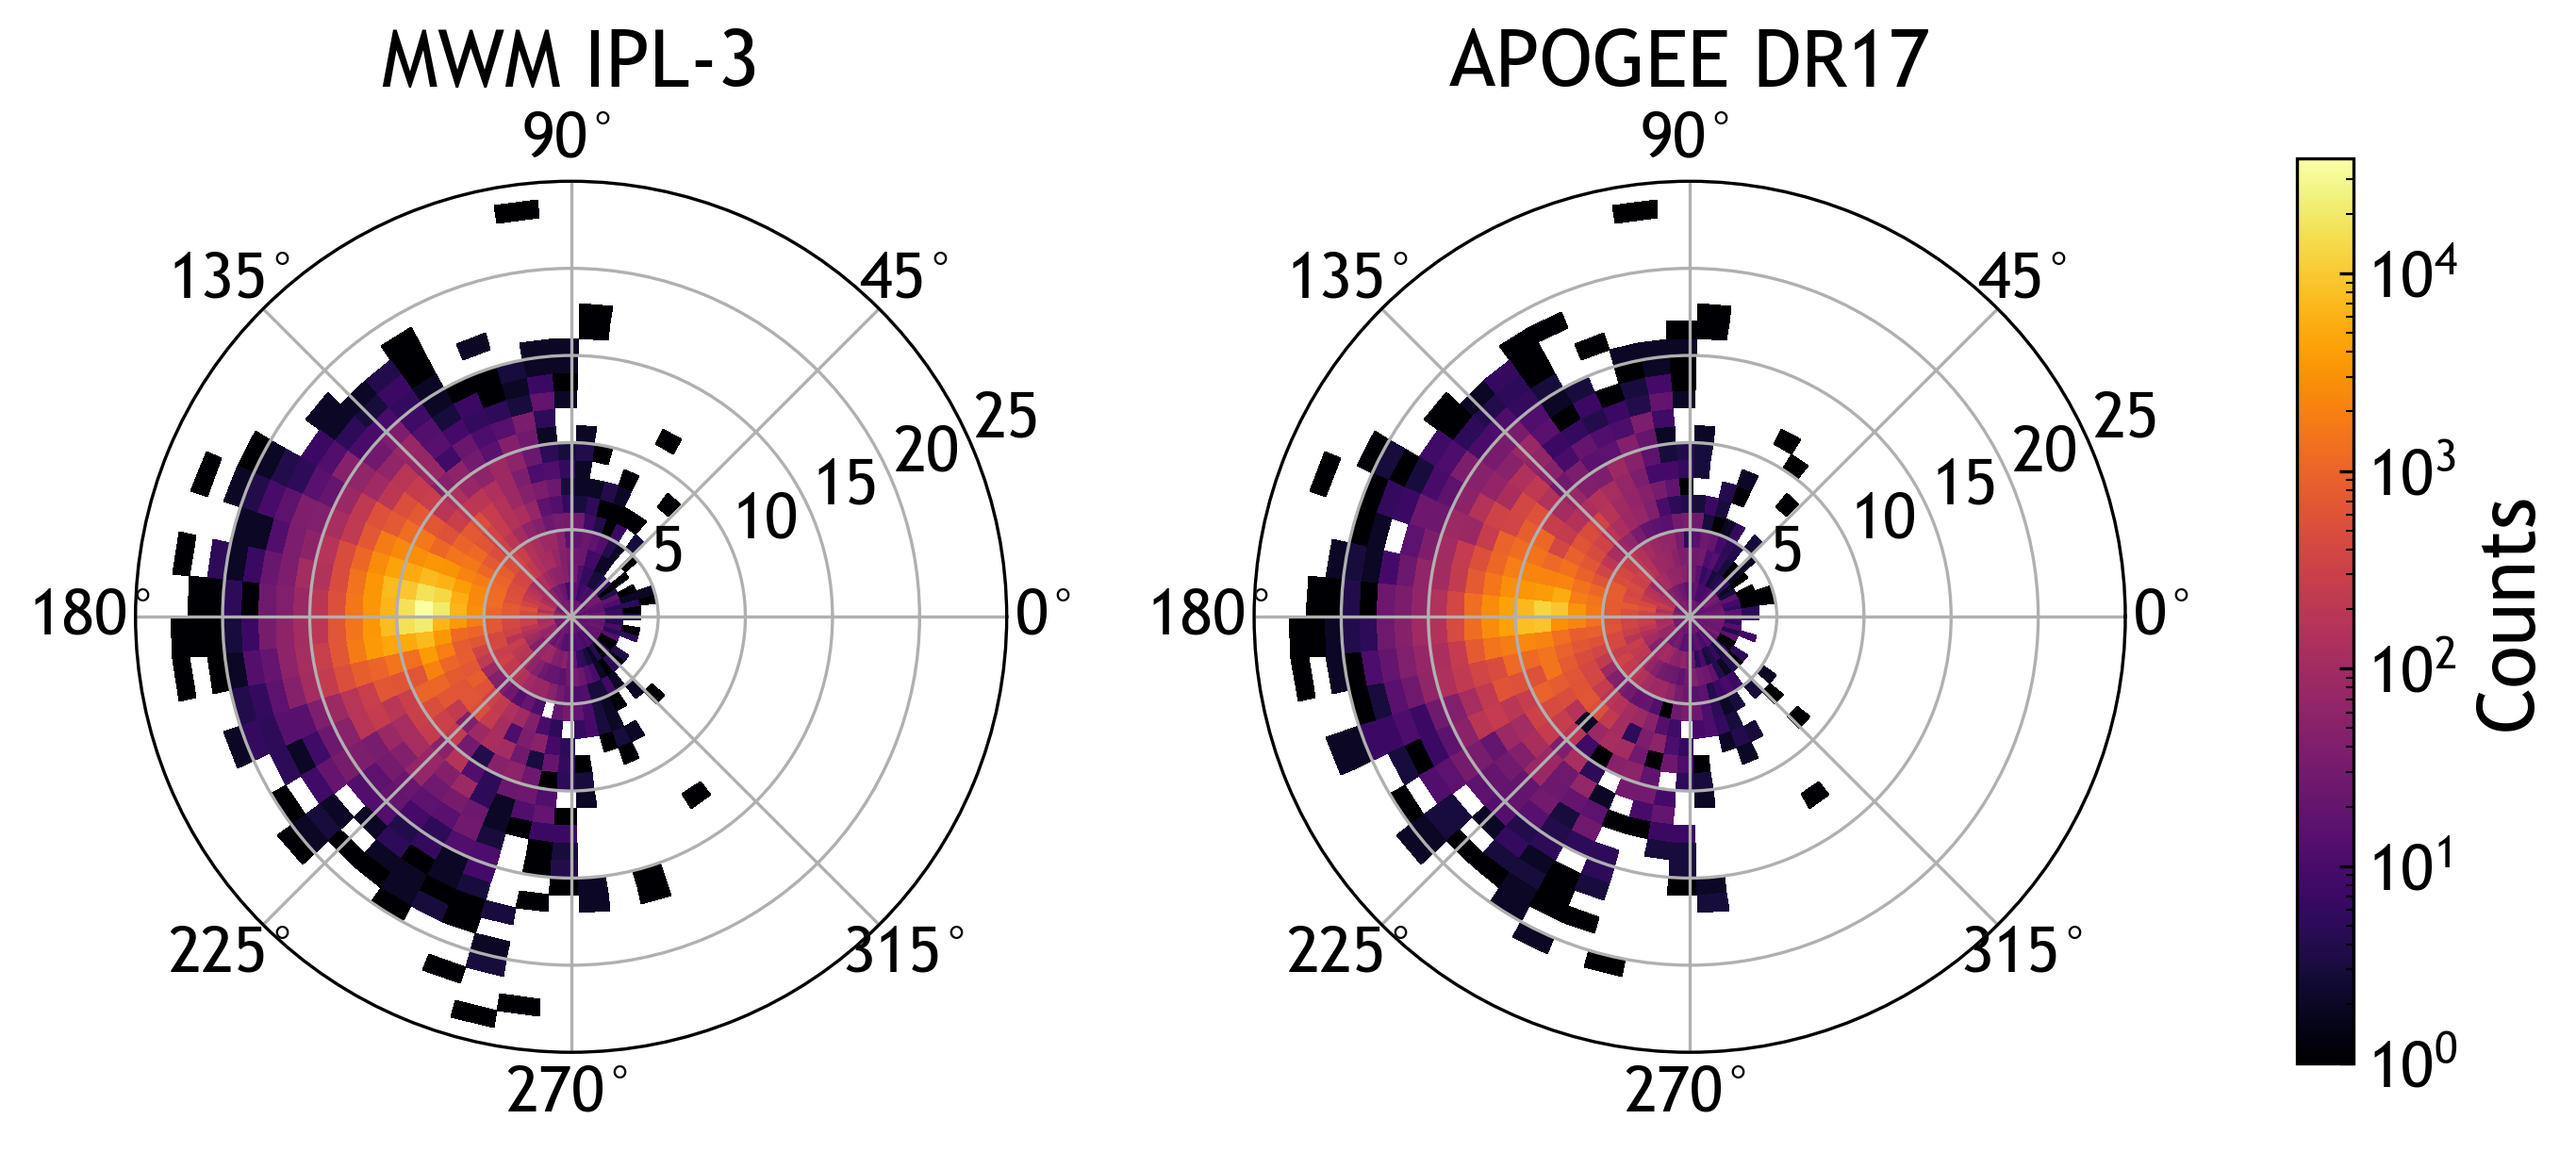

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), 
                        sharex=True, sharey=True, 
                        subplot_kw={'projection': 'polar'})
# MWM
abins = np.linspace(-np.pi, np.pi, 60)
rbins = np.arange(0, 26, 1)
mwm_hist, _, _ = np.histogram2d(mwm_data['GALPHI']*np.pi/180, mwm_data['GALR'], bins=(abins, rbins))
A, R = np.meshgrid(abins, rbins)
norm = LogNorm()
pc0 = axs[0].pcolormesh(A, R, mwm_hist.T, cmap='inferno', norm=norm)
axs[0].set_title('MWM IPL-3')
# fig.colorbar(pc0, ax=axs[0], label='Counts')
# APOGEE
apogee_hist, _, _ = np.histogram2d(apogee_data['GALPHI']*np.pi/180, apogee_data['GALR'], bins=(abins, rbins))
pc1 = axs[1].pcolormesh(A, R, apogee_hist.T, cmap='inferno', norm=norm)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.85)
cax = plt.axes([0.9, 0.1, 0.02, 0.8])
fig.colorbar(pc1, cax, label='Counts')
plt.show()

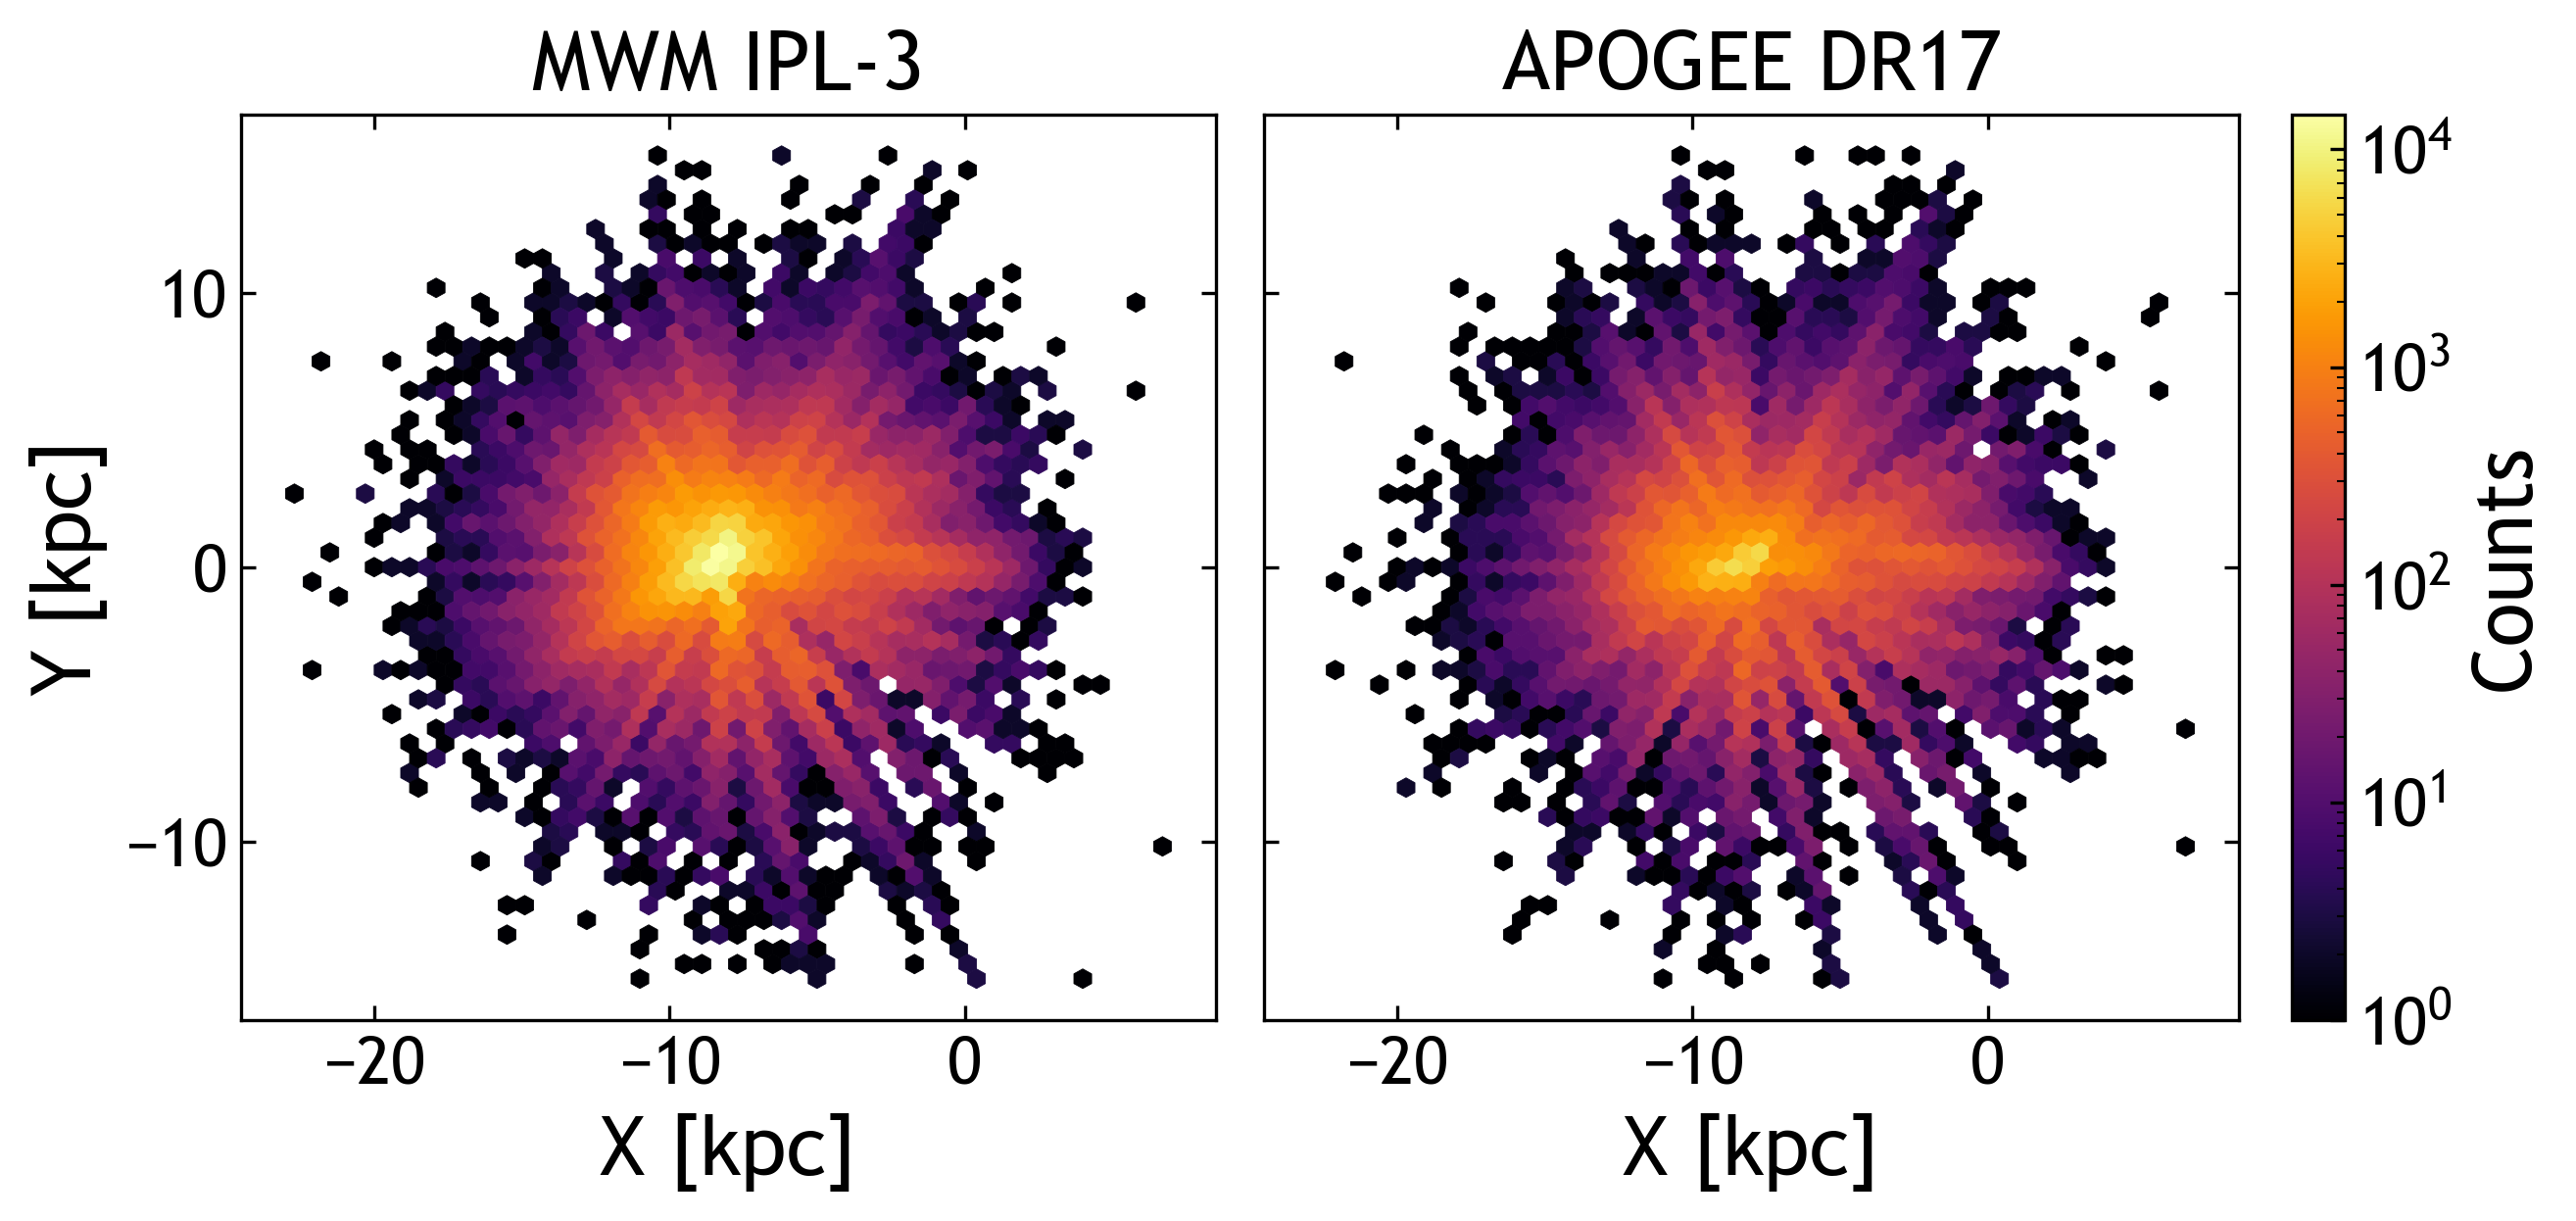

In [6]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (-23, 7)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
# convert galactocentric coordinates to cartesian
x, y = pol2cart(mwm_data['GALR'], mwm_data['GALPHI']*np.pi/180)
norm = LogNorm()
hb0 = axs[0].hexbin(x, y, gridsize=50, cmap='inferno', norm=norm, extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
x, y = pol2cart(apogee_data['GALR'], apogee_data['GALPHI']*np.pi/180)
hb1 = axs[1].hexbin(x, y, gridsize=50, cmap='inferno', norm=norm, extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Counts')
axs[0].set_xlabel('X [kpc]')
axs[1].set_xlabel('X [kpc]')
axs[0].set_ylabel('Y [kpc]')
plt.show()

## Galactocentric radius vs midplane distance

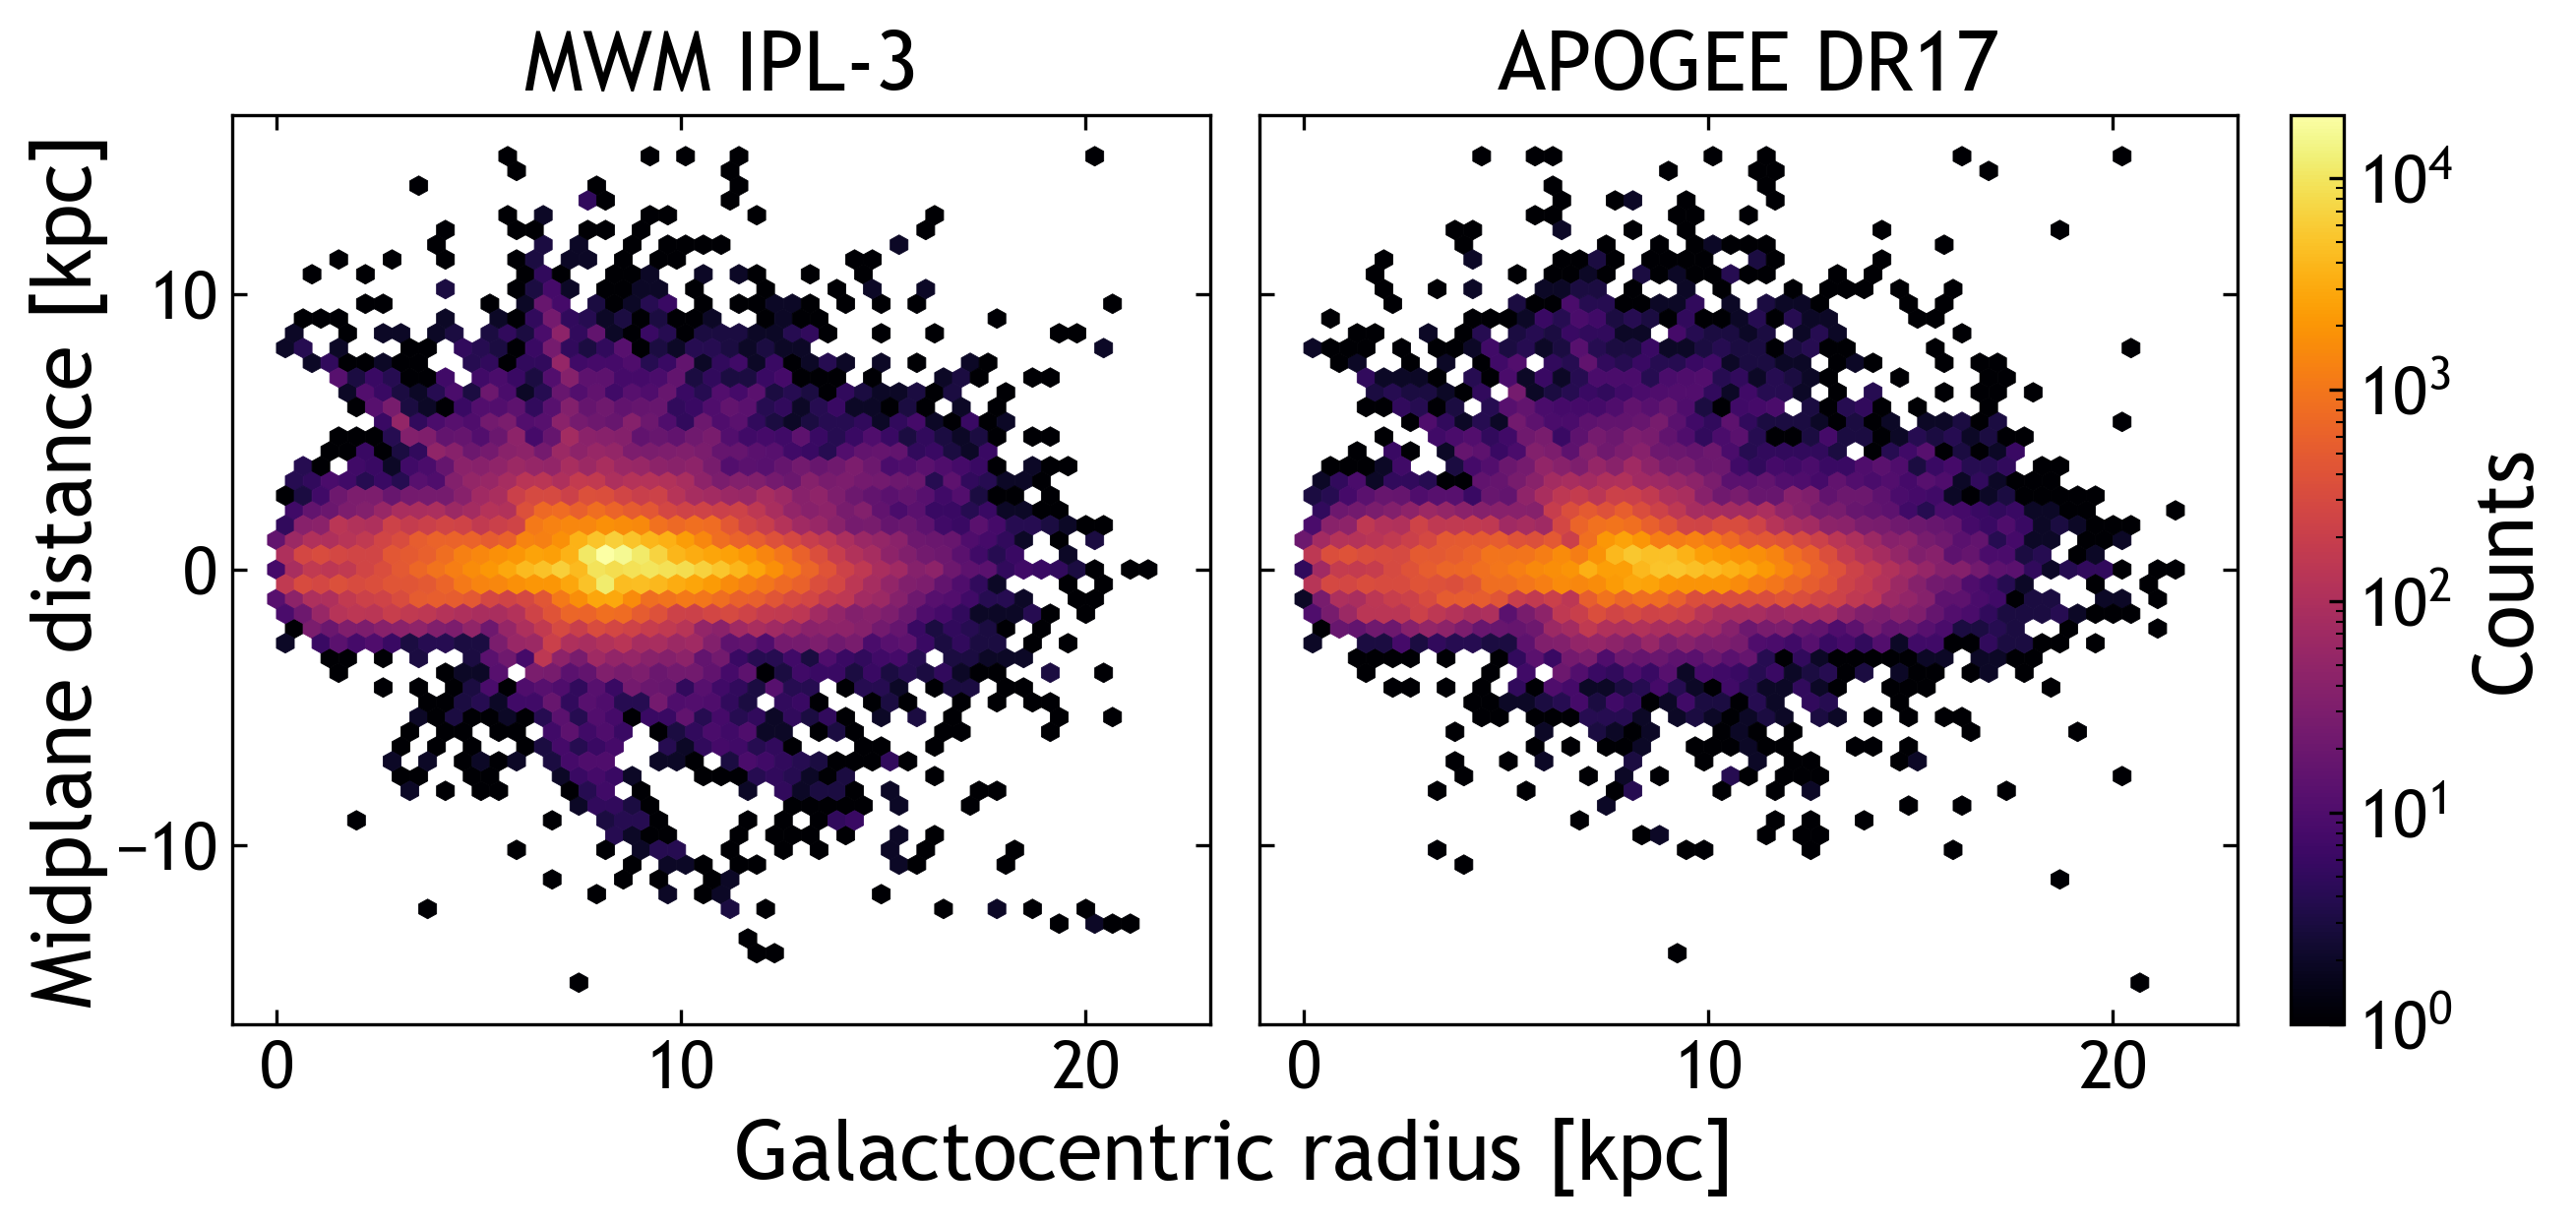

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (0, 22)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
norm = LogNorm()
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Counts')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

## Abundance Trends

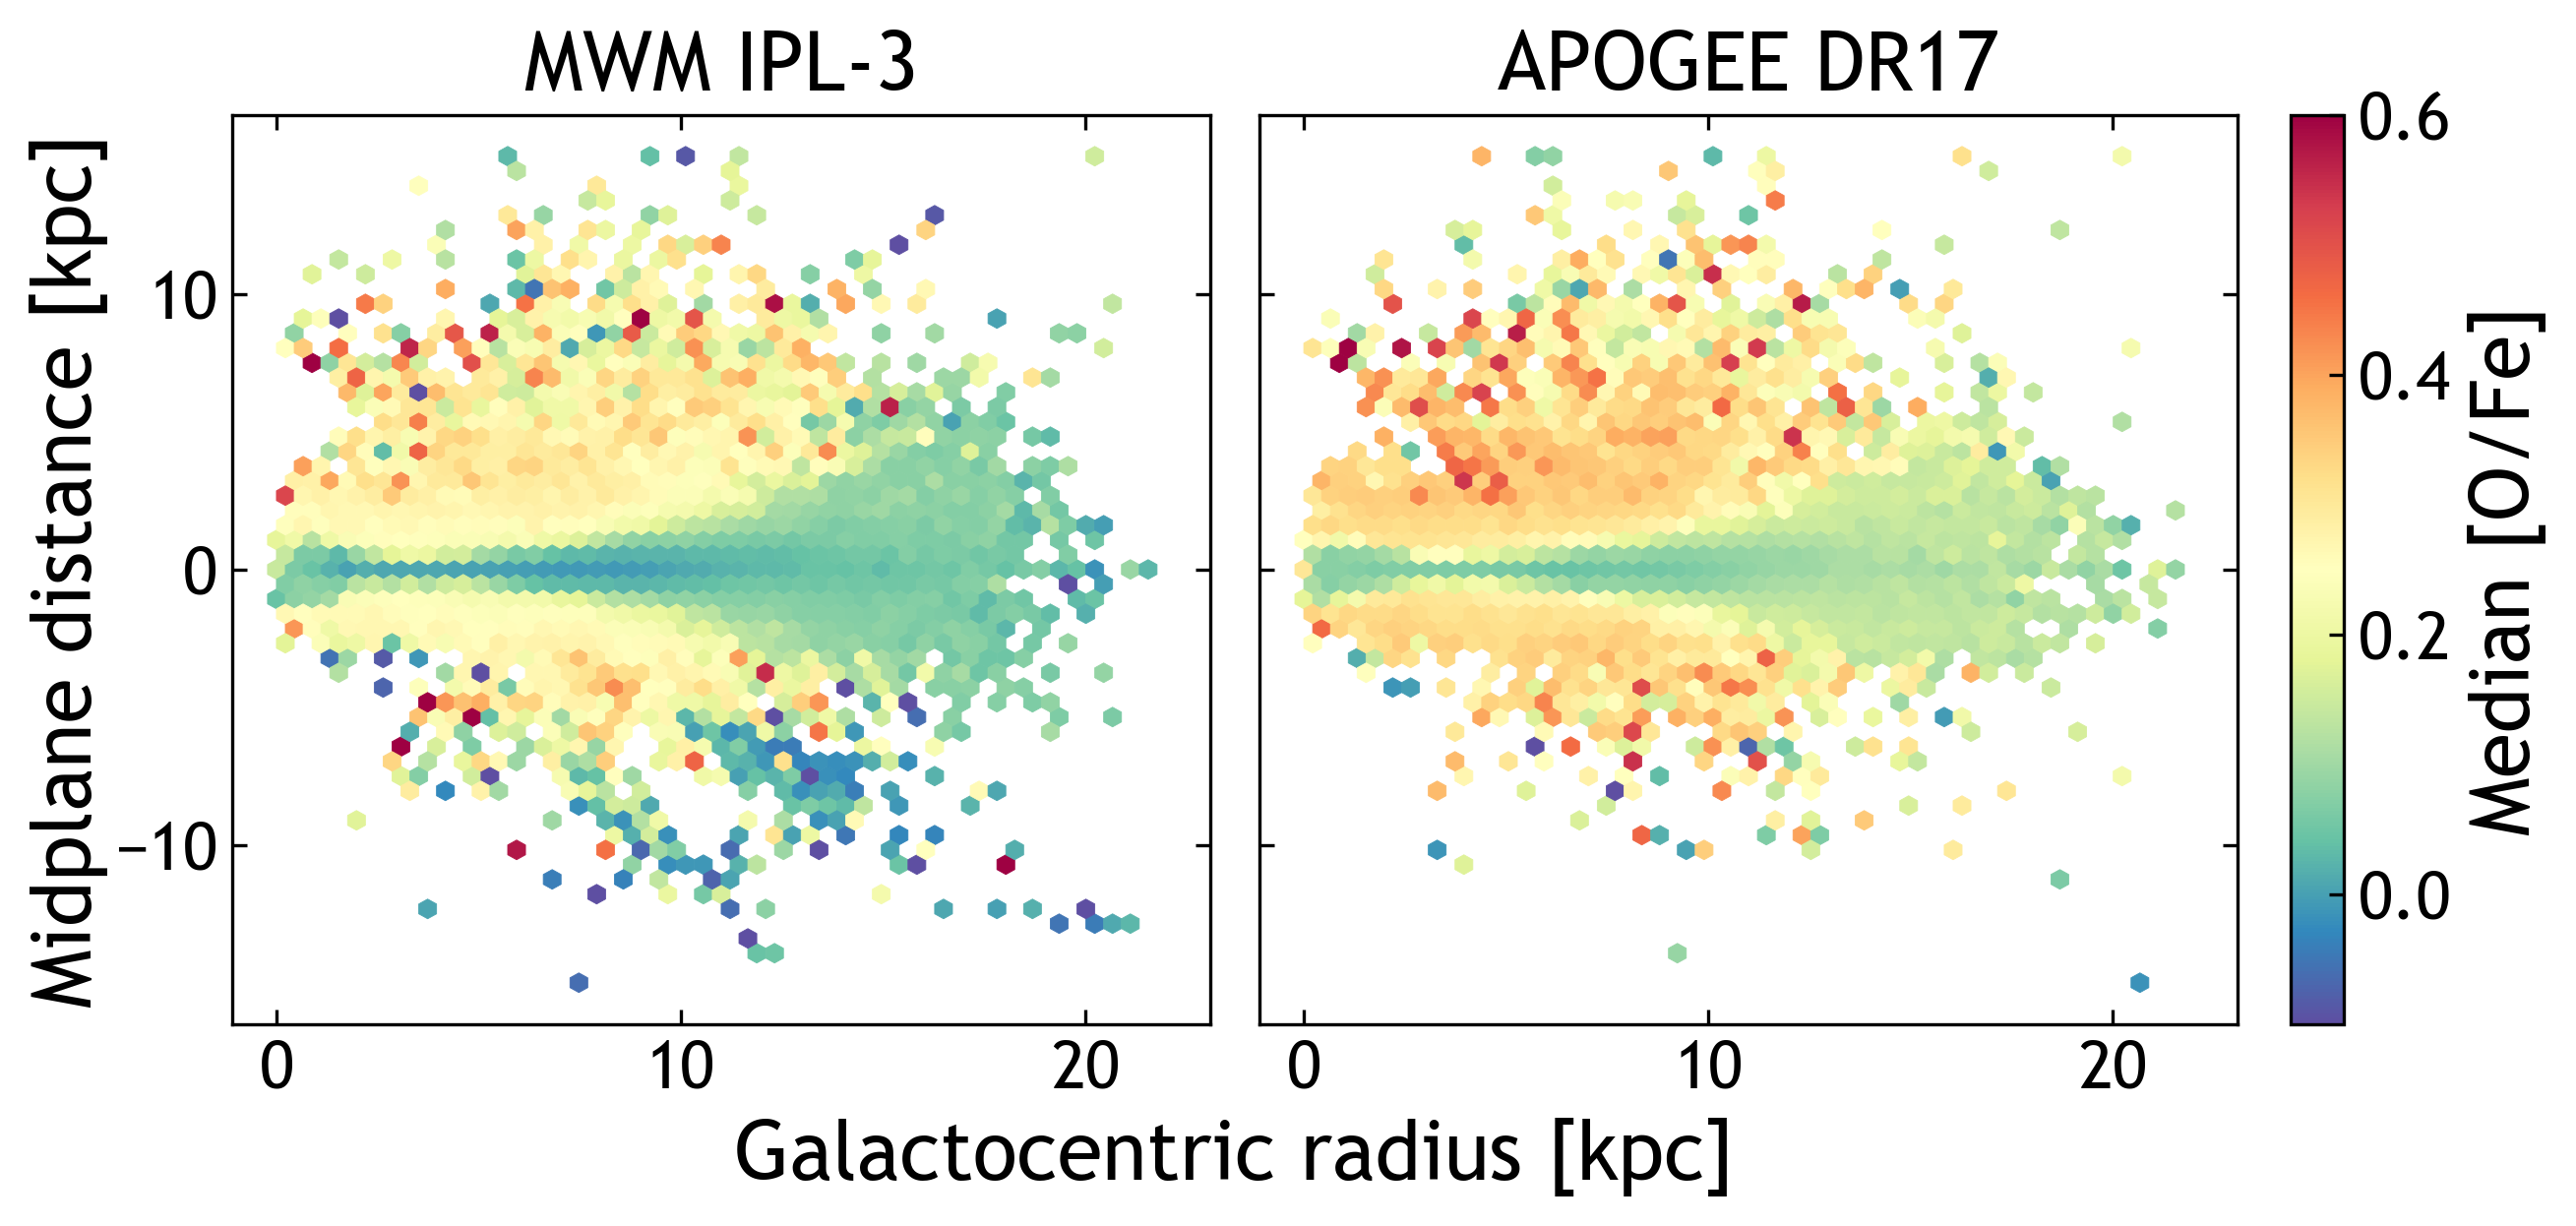

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (0, 22)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    C=mwm_data['O_FE'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r', 
                    vmin=-0.1, vmax=0.6,
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['O_FE'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r',
                    vmin=-0.1, vmax=0.6,
                    extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Median [O/Fe]')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

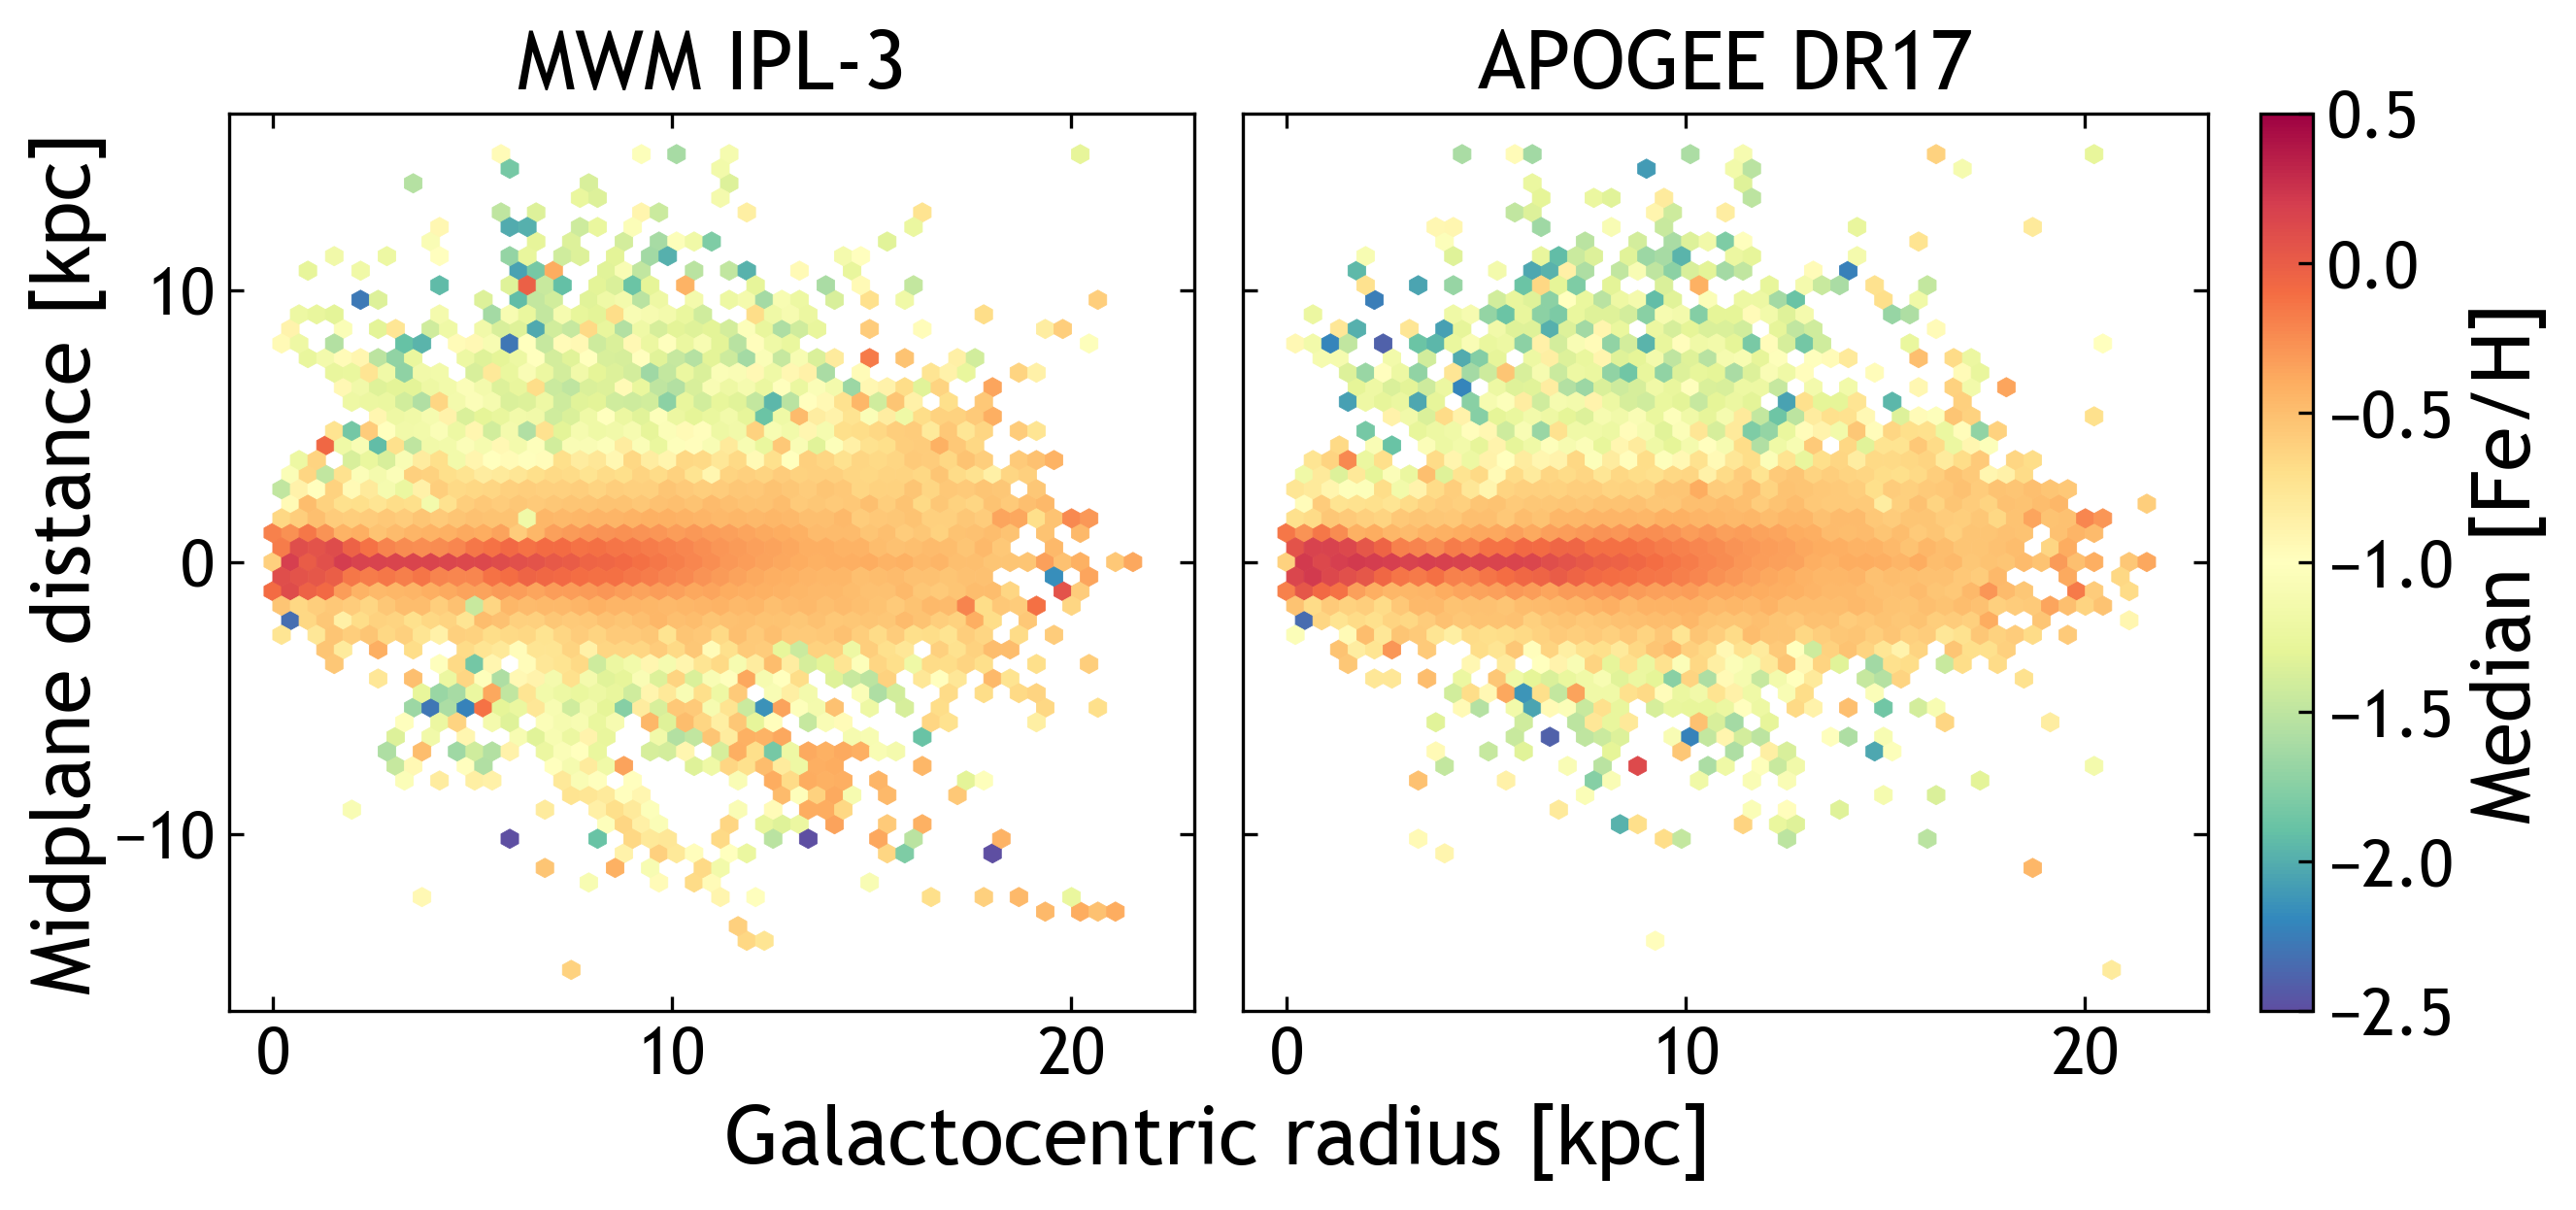

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4), 
                        sharex=True, sharey=True)
xlim = (0, 22)
ylim = (-15, 15)
extent = [xlim[0], xlim[1], ylim[0], ylim[1]]
# MWM
hb0 = axs[0].hexbin(mwm_data['GALR'], mwm_data['GALZ'], 
                    C=mwm_data['FE_H'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r', 
                    vmin=-2.5, vmax=0.5,
                    extent=extent, linewidths=0.2)
axs[0].set_title('MWM IPL-3')
# APOGEE
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['FE_H'], reduce_C_function=np.median,
                    gridsize=50, cmap='Spectral_r',
                    vmin=-2.5, vmax=0.5,
                    extent=extent, linewidths=0.2)
axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.05)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb1, cax, label='Median [Fe/H]')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

## Abundance Distribution Functions

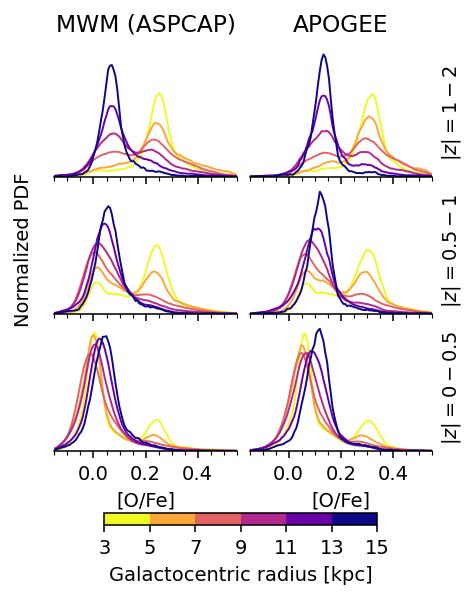

In [39]:
fig, axs = dfs.setup_axes(ncols=2, xlabel='[O/Fe]', figure_width=3.25)
plt.style.use('default')
colors = get_color_list(plt.get_cmap('plasma_r'), _globals.GALR_BINS)
mdf_kwargs = {'bins': 100, 'range': (-0.15, 0.55), 'smoothing': 0.05}
# Plot MWM distributions
dfs.plot_apogee_mdfs(mwm_data, axs[:,0], col='O_FE', colors=colors, label='MWM (ASPCAP)',
                     **mdf_kwargs)
# Plot APOGEE distributions
dfs.plot_apogee_mdfs(apogee_data, axs[:,1], col='O_FE', colors=colors, 
                     **mdf_kwargs)
axs[0,0].set_xlim(mdf_kwargs['range'])
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.2))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.05))
for ax in axs[:,0]:
    ax.set_ylim((0, None))
plt.gcf().set_dpi(140)
plt.show()

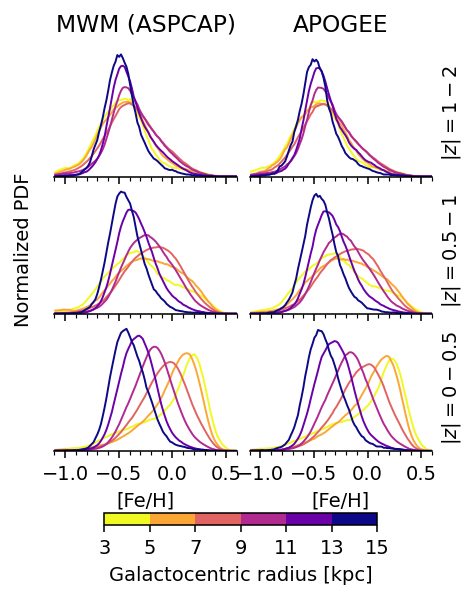

In [47]:
fig, axs = dfs.setup_axes(ncols=2, xlabel='[Fe/H]', figure_width=3.25)
plt.style.use('default')
colors = get_color_list(plt.get_cmap('plasma_r'), _globals.GALR_BINS)
mdf_kwargs = {'bins': 100, 'range': (-1.1, 0.6), 'smoothing': 0.2}
# Plot MWM distributions
dfs.plot_apogee_mdfs(mwm_data, axs[:,0], col='FE_H', colors=colors, label='MWM (ASPCAP)',
                     **mdf_kwargs)
# Plot APOGEE distributions
dfs.plot_apogee_mdfs(apogee_data, axs[:,1], col='FE_H', colors=colors, 
                     **mdf_kwargs)
axs[0,0].set_xlim(mdf_kwargs['range'])
axs[0,0].xaxis.set_major_locator(MultipleLocator(0.5))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.1))
for ax in axs[:,0]:
    ax.set_ylim((0, None))
plt.gcf().set_dpi(140)
plt.show()

In [49]:
mwm_data.columns.to_list()

['sdss_id',
 'sdss4_apogee_id',
 'gaia_dr2_source_id',
 'gaia_dr3_source_id',
 'tic_v8_id',
 'healpix',
 'carton_0',
 'lead',
 'version_id',
 'catalogid',
 'catalogid21',
 'catalogid25',
 'catalogid31',
 'n_associated',
 'n_neighborhood',
 'sdss4_apogee_target1_flags',
 'sdss4_apogee_target2_flags',
 'sdss4_apogee2_target1_flags',
 'sdss4_apogee2_target2_flags',
 'sdss4_apogee2_target3_flags',
 'sdss4_apogee_member_flags',
 'sdss4_apogee_extra_target_flags',
 'ra',
 'dec',
 'l',
 'b',
 'plx',
 'e_plx',
 'pmra',
 'e_pmra',
 'pmde',
 'e_pmde',
 'gaia_v_rad',
 'gaia_e_v_rad',
 'g_mag',
 'bp_mag',
 'rp_mag',
 'j_mag',
 'e_j_mag',
 'h_mag',
 'e_h_mag',
 'k_mag',
 'e_k_mag',
 'ph_qual',
 'bl_flg',
 'cc_flg',
 'w1_mag',
 'e_w1_mag',
 'w1_flux',
 'w1_dflux',
 'w1_frac',
 'w2_mag',
 'e_w2_mag',
 'w2_flux',
 'w2_dflux',
 'w2_frac',
 'w1uflags',
 'w2uflags',
 'w1aflags',
 'w2aflags',
 'mag4_5',
 'd4_5m',
 'rms_f4_5',
 'sqf_4_5',
 'mf4_5',
 'csf',
 'zgr_teff',
 'zgr_e_teff',
 'zgr_logg',
 'zgr_e_l

In [57]:
# All MWM stars also in APOGEE
mwm_data[mwm_data['sdss4_apogee_id'].notna()]

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,raw_e_ti_2_h,raw_v_h,raw_e_v_h,O_FE,O_FE_ERR,FE_H,FE_H_ERR,GALR,GALPHI,GALZ
0,116010946,2M03455125+3159498,216648634427297920,216648634427297920,26393503,45904,NaN,gaia_dr3_source,31,63050396568859167,...,NaN,-0.77444,0.002761,0.165681,0.042832,-0.440753,0.011268,12.087988,173.578696,-1.286873
1,115031735,2M03521570+2245296,64097924425213440,64097924425760896,440704022,60242,NaN,gaia_dr3_source,31,63050396552988608,...,NaN,-0.68217,0.000180,0.061359,0.030318,-0.524303,0.010089,9.947272,177.879409,-0.787836
2,114941357,2M03521583+1251133,37082820650773632,37082820650773632,242883458,76626,NaN,gaia_dr3_source,31,63050396551977516,...,NaN,-0.55261,0.000382,-0.015609,0.031277,-0.130393,0.010183,8.721607,179.757534,-0.333179
3,115029776,2M03521583+2129049,63675918118074240,63675918118074240,440704542,62290,NaN,gaia_dr3_source,31,63050396552967384,...,NaN,-0.63475,0.001017,0.134281,0.034340,-0.331533,0.010481,9.832419,178.162043,-0.768381
4,76315157,2M03521608+0923173,3302476533731766400,3302476533731766400,345453479,81746,NaN,gaia_dr3_source,31,63050395130270017,...,NaN,-0.42060,0.000946,0.093151,0.033987,-0.306583,0.010466,9.291797,179.937830,-0.733905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386578,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,NaN,-0.75906,0.001375,0.085641,0.035345,-0.447573,0.010665,12.102105,173.705737,-1.250867
386579,54636799,2M03484443+5409069,444479091656883840,444479091656883840,86637304,18685,NaN,gaia_dr3_source,31,63050394790173013,...,NaN,-0.16905,0.000304,0.016659,0.031530,0.019210,0.010150,9.831466,173.759186,0.018624
386580,115028161,2M03484463+2052406,63258236840589056,63258236840589056,440689754,63313,NaN,gaia_dr3_source,31,63050396552949649,...,NaN,-0.59001,0.000866,0.013251,0.033119,-0.021603,0.010411,9.273240,178.663139,-0.536094
386581,114948039,2M03484484+1416348,39727833309894400,39727833309894400,59003384,73553,NaN,gaia_dr3_source,31,63050396552057306,...,NaN,-0.57891,0.000605,0.040747,0.032429,-0.258403,0.010284,9.009043,179.466832,-0.496640


In [88]:
apogee_ofe = apogee_data[['APOGEE_ID', 'FE_H', 'FE_H_ERR', 'O_FE', 'O_FE_ERR']].set_index('APOGEE_ID')
joined_data = mwm_data.join(apogee_ofe, on='sdss4_apogee_id', rsuffix='_APOGEE', how='inner')
joined_data['O_H_APOGEE'] = joined_data['O_FE_APOGEE'] + joined_data['FE_H_APOGEE']
joined_data

,sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,...,FE_H,FE_H_ERR,GALR,GALPHI,GALZ,FE_H_APOGEE,FE_H_ERR_APOGEE,O_FE_APOGEE,O_FE_ERR_APOGEE,O_H_APOGEE
4,76315157,2M03521608+0923173,3302476533731766400,3302476533731766400,345453479,81746,NaN,gaia_dr3_source,31,63050395130270017,...,-0.306583,0.010466,9.291797,179.937830,-0.733905,-0.300210,0.007601,0.127506,0.018748,-0.172704
8,76316043,2M03521679+1019126,3302750793161696384,3302750793161696384,345453750,80722,NaN,gaia_dr3_source,31,63050395130278177,...,0.233057,0.010225,8.508069,179.940052,-0.222482,0.245450,0.006541,0.043590,0.012953,0.289040
9,116034228,2M03521683+3732447,220523760081484416,220523760081484416,346899013,38227,NaN,gaia_dr3_source,31,63050396569224985,...,-0.559213,0.011036,12.343712,172.330752,-0.963448,-0.552690,0.010905,0.182833,0.038367,-0.369857
13,116048916,2M03521715+3740325,223528794079510400,223528794079510400,346898895,37714,NaN,gaia_dr3_source,31,63050396569489466,...,-0.130253,0.011052,9.202211,177.317716,-0.233444,-0.123630,0.009624,0.020719,0.035104,-0.102911
14,116247398,2M03522037+4829457,249963218276707456,249963218276707456,428909207,24491,NaN,gaia_dr3_source,31,63050396574003263,...,0.180807,0.010757,10.976541,172.047442,-0.204836,0.207590,0.009615,0.060669,0.015479,0.268259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386522,55102367,2M03484025+6719297,493210477791383424,493210477791383424,85621300,7603,NaN,gaia_dr3_source,31,63050394801194436,...,-0.054089,0.011288,9.629168,172.548450,0.361908,-0.044170,0.011234,0.036883,0.032159,-0.007287
386526,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,-0.453873,0.010834,12.102105,173.705737,-1.250867,-0.442570,0.009148,0.139618,0.015759,-0.302952
386527,116012082,2M03484436+3206590,216827442507284864,216827442507284864,26529654,45905,NaN,gaia_dr3_source,31,63050396568870197,...,-0.447573,0.010665,12.102105,173.705737,-1.250867,-0.442570,0.009148,0.139618,0.015759,-0.302952
386528,54636799,2M03484443+5409069,444479091656883840,444479091656883840,86637304,18685,NaN,gaia_dr3_source,31,63050394790173013,...,0.019210,0.010150,9.831466,173.759186,0.018624,0.039027,0.008141,0.068954,0.008266,0.107981


In [78]:
np.median(joined_data['O_FE_APOGEE'] - joined_data['O_FE'])

0.0590091968

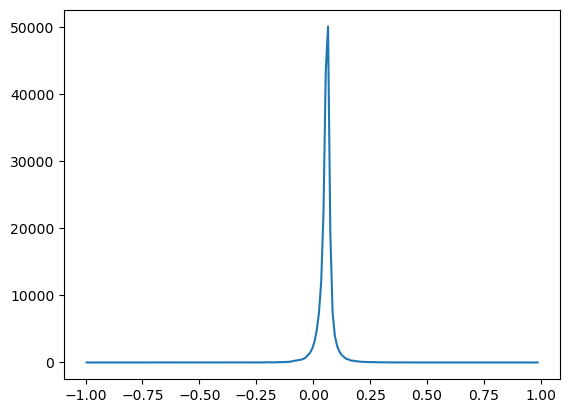

In [80]:
bins = np.arange(-1, 1, 0.01)
hist, _ = np.histogram(joined_data['O_FE_APOGEE'] - joined_data['O_FE'], bins=bins)
fig, ax = plt.subplots()
ax.plot(get_bin_centers(bins), hist)
plt.show()

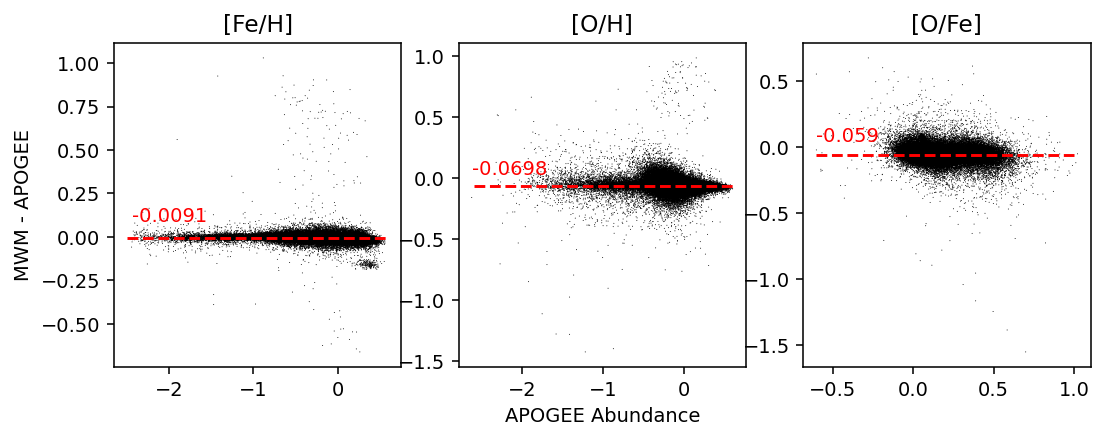

Bad pipe message: %s [b'zilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/115', b'\r\nAccept: text/plain, */*; q=0.01\r\nAccept-Lan']
Bad pipe message: %s [b'age: en-US,en;q=0.5\r\nAccept-Encoding: gzip, deflate, br\r\nOrigin: https://api-de8c7017.duosecurity.com\r', b'onnection', b'keep-alive\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\n']


In [134]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), dpi=140)
plt.style.use('default')
axs[0].set_title('[Fe/H]')
axs[0].scatter(joined_data['FE_H_APOGEE'], joined_data['FE_H'] - joined_data['FE_H_APOGEE'], s=1, marker='.', edgecolor='none', c='k', rasterized=True)
med_diff = np.median(joined_data['FE_H'] - joined_data['FE_H_APOGEE'])
axs[0].plot([-2.5, 0.6], [med_diff, med_diff], 'r--')
axs[0].text(joined_data['FE_H_APOGEE'].min(), med_diff + 0.1, round(med_diff,4), color='r')
axs[1].set_title('[O/H]')
axs[1].scatter(joined_data['O_H_APOGEE'], joined_data['o_h'] - joined_data['O_H_APOGEE'], s=1, marker='.', edgecolor='none', c='k', rasterized=True)
med_diff = np.median(joined_data['o_h'] - joined_data['O_H_APOGEE'])
axs[1].plot([-2.6, 0.6], [med_diff, med_diff], 'r--')
axs[1].text(joined_data['O_H_APOGEE'].min(), med_diff + 0.1, round(med_diff,4), color='r')
axs[2].set_title('[O/Fe]')
axs[2].scatter(joined_data['O_FE_APOGEE'], joined_data['O_FE'] - joined_data['O_FE_APOGEE'], s=1, marker='.', edgecolor='none', c='k', rasterized=True)
med_diff = np.median(joined_data['O_FE'] - joined_data['O_FE_APOGEE'])
axs[2].plot([-0.6, 1.], [med_diff, med_diff], 'r--')
axs[2].text(joined_data['O_FE_APOGEE'].min(), med_diff + 0.1, round(med_diff,4), color='r')
axs[1].set_xlabel('APOGEE Abundance')
axs[0].set_ylabel('MWM - APOGEE')
plt.show()